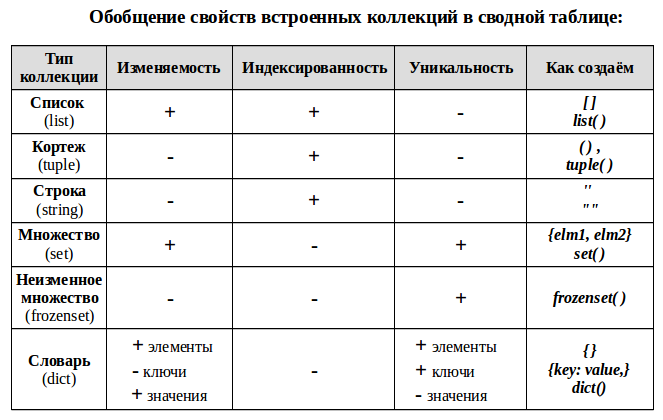

In [1]:
from functions import picture
picture('06d94a1.png')

Для того, чтобы объект мог быть ключом словаря, он должен быть хешируем. У кортежа, возможен случай, когда его элемент является не хешируемым объектом, и соответственно сам кортеж тогда тоже не является хешируемым и не может выступать ключом словаря.

In [ ]:
a = (1, [2, 3], 4)
print(type(a))   # <type 'tuple'>
b = {a: 1}       # TypeError: unhashable type: 'list'

Не меняйте количество элементов коллекции в теле цикла во время итерации по этой же коллекции! — Это порождает не всегда очевидные на первый взгляд ошибки.

Чтобы этого избежать подобных побочных эффектов, можно, например, итерировать копию коллекции:

In [ ]:
my_list = [1, 2, 2, 2, 2, 3]
for elm in list(my_list):
    pass
    	# Теперь можете удалять и добавлять элементы в исходный список my_list,
    	# так как итерация идет по его копии.

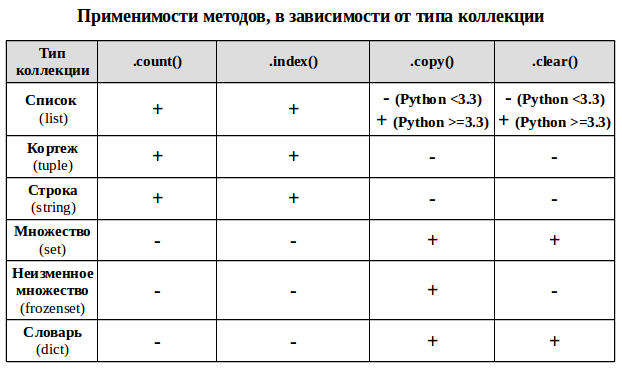

In [2]:
picture('b46976.png')

При конвертации индексированной коллекции в неиндексированную теряется информация о порядке элементов, а в некоторых случаев она может быть критически важной!

После конвертации в не изменяемый тип, мы больше не сможем менять элементы коллекции — удалять, изменять, добавлять новые. Это может привести к ошибкам в наших функциях обработки данных, если они были написаны для работы с изменяемыми коллекциями.

Если Ваша коллекция содержит изменяемые элементы (например список списков), то ее нельзя конвертировать в не изменяемую коллекцию, так как ее элементы могут быть только не изменяемыми!

In [ ]:
my_list = [1, [2, 3], 4]
my_set = set(my_list)   # TypeError: unhashable type: 'list'

Поскольку кортежи и строки у нас неизменяемые коллекции, то по индексу мы можем только брать элементы, но не менять их:

In [ ]:
my_tuple = (1, 2, 3, 4, 5)
print(my_tuple[0])	  # 1
my_tuple[0] = 100         # TypeError: 'tuple' object does not support item assignment

При срезе, первый индекс входит в выборку, а второй нет!
То есть от старта включительно, до стопа, где стоп не включается в результат. Математически это можно было бы записать как [start, stop)

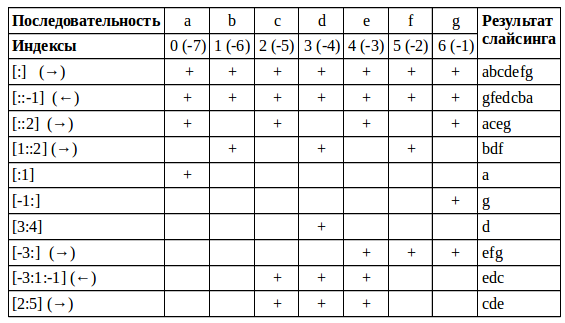

In [5]:
picture('05def0e.png')

In [ ]:
col = 'abcdefg'
print(col[:])       # abcdefg
print(col[::-1])    # gfedcba
print(col[::2])     # aceg
print(col[1::2])    # bdf
print(col[:1])      # a
print(col[-1:])     # g
print(col[3:4])     # d
print(col[-3:])     # efg
print(col[-3:1:-1]) # edc
print(col[2:5])     # cde

Именованные срезы

Чтобы избавится от «магических констант», особенно в случае, когда один и тот же срез надо применять многократно, можно задать константы с именованными срезами с пользованием специальной функции slice()()

Примечание: Nonе соответствует опущенному значению по-умолчанию. То есть [:2] становится slice(None, 2), а [1::2] становится slice(1, None, 2).

In [ ]:
person = ('Alex', 'Smith', "May", 10, 1980)
NAME, BIRTHDAY = slice(None, 2), slice(2, None)       
	# задаем константам именованные срезы
        # данные константы в квадратных скобках заменятся соответствующими срезами
print(person[NAME])      # ('Alex', 'Smith')
print(person[BIRTHDAY])  # ('May', 10, 1980)

In [ ]:
my_list = [1, 2, 3, 4, 5, 6, 7]
EVEN = slice(1, None, 2)
print(my_list[EVEN])     # [2, 4, 6]

Изменение списка срезом

Даже если хотим добавить один элемент, необходимо передавать итерируемый объект, иначе будет ошибка TypeError: can only assign an iterable

In [ ]:
my_list = [1, 2, 3, 4, 5]
# my_list[1:2] = 20     # TypeError: can only assign an iterable
my_list[1:2] = [20]     # Вот теперь все работает
print(my_list)          # [1, 20, 3, 4, 5]

Для вставки одиночных элементов можно использовать срез, но делать так не рекомендую, так как такой синтаксис хуже читать. Лучше использовать методы списка .append() и .insert():

Можно менять части последовательности — это применение выглядит наиболее интересным, так как решает задачу просто и наглядно.

In [ ]:
my_list = [1, 2, 3, 4, 5]
my_list[1:3] = [20, 30]
print(my_list)          # [1, 20, 30, 4, 5]
my_list[1:3] = [0]      # нет проблем заменить два элемента на один
print(my_list)          # [1, 0, 4, 5]
my_list[2:] = [40, 50, 60]   # или два элемента на три
print(my_list)               # [1, 0, 40, 50, 60]

Можно просто удалить часть последовательности

In [ ]:
my_list = [1, 2, 3, 4, 5]
my_list[:2] = []    # или del my_list[:2]
print(my_list)      # [3, 4, 5]

в случае выхода границ среза за границы коллекции никакой ошибки не происходит:

In [ ]:
my_list = [1, 2, 3, 4, 5]
print(my_list[0:10])      # [1, 2, 3, 4, 5] — отработали в пределах коллекции
print(my_list[10:100])	  # [] - таких элементов нет — вернули пустую коллекцию
print(my_list[10:11])     # [] - проверяем 1 отсутствующий элемент - пустая коллекция, без ошибки

Пример сортировки списка строк по длине len() каждого элемента:

In [ ]:
my_files = ['somecat.jpg', 'pc.png', 'apple.bmp', 'mydog.gif']
my_files_sorted = sorted(my_files, key=len)
print(my_files_sorted)      # ['pc.png', 'apple.bmp', 'mydog.gif', 'somecat.jpg']

У списка (и только у него) есть особые методы .sort() и .reverse() которые делают тоже самое, что соответствующие функции sorted() и reversed(), но при этом:

Меняют сам исходный список, а не генерируют новый;
Возвращают None, а не новый список;
поддерживают те же дополнительные аргументы;
в них не надо передавать сам список первым параметром, более того, если это сделать — будет ошибка — не верное количество аргументов.

In [ ]:
my_list = [2, 5, 1, 7, 3]
my_list = my_list.sort()
print(my_list)          # None

In [ ]:
my_list = [2, 5, 1, 7, 3]
my_list.sort()
print(my_list)          # [1, 2, 3, 5, 7]

В сортировке словаря есть свои особенности, вызванные тем, что элемент словаря — это пара ключ: значение.

UPD: Так же, не забываем, что говоря о сортировке словаря, мы имеем ввиду сортировку полученных из словаря данных для вывода или сохранения в индексированную коллекцию. Сохранить данные сортированными в самом стандартном словаре не получится, они в нем, как и других неиндексированных коллекциях находятся в произвольном порядке.

sorted(my_dict) — когда мы передаем в функцию сортировки словарь без вызова его дополнительных методов — идёт перебор только ключей, сортированный список ключей нам и возвращается;
sorted(my_dict.keys()) — тот же результат, что в предыдущем примере, но прописанный более явно;
sorted(my_dict.items()) — возвращается сортированный список кортежей (ключ, значение), сортированных по ключу;
sorted(my_dict.values()) — возвращается сортированный список значений

In [ ]:
my_dict = {'a': 1, 'c': 3, 'e': 5, 'f': 6, 'b': 2, 'd': 4}
mysorted = sorted(my_dict)
print(mysorted)           # ['a', 'b', 'c', 'd', 'e', 'f']
mysorted = sorted(my_dict.items())
print(mysorted)           # [('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5), ('f', 6)]
mysorted = sorted(my_dict.values())
print(mysorted)           # [1, 2, 3, 4, 5, 6]

Отдельные сложности может вызвать сортировка словаря не по ключам, а по значениям, если нам не просто нужен список значений, и именно выводить пары в порядке сортировки по значению.

Для решения этой задачи можно в качестве специальной функции сортировки передавать lambda-функцию lambda x: x[1] которая из получаемых на каждом этапе кортежей (ключ, значение) будет брать для сортировки второй элемент кортежа.

In [ ]:
population = {"Shanghai": 24256800, "Karachi": 23500000, "Beijing": 21516000, "Delhi": 16787941}
# отсортируем по возрастанию населения:
population_sorted = sorted(population.items(), key=lambda x: x[1])
print(population_sorted)
# [('Delhi', 16787941), ('Beijing', 21516000), ('Karachi', 23500000), ('Shanghai', 24256800)]

Допустим, у нас есть список кортежей названий деталей и их стоимостей.
Нам нужно отсортировать его сначала по названию деталей, а одинаковые детали по убыванию цены.

In [17]:
shop = [('каретка', 1200), ('шатун', 1000), ('седло', 300),
        ('педаль', 100), ('седло', 1500), ('рама', 12000),
        ('обод', 2000), ('шатун', 200), ('седло', 2700)]

# def prepare_item(item):
#     return (item[0], -item[1])
# 
# shop.sort(key=prepare_item)
# print(shop)
shop.sort(key=lambda x:(x[0], -x[1]))
print(shop)

[('каретка', 1200), ('обод', 2000), ('педаль', 100), ('рама', 12000), ('седло', 2700), ('седло', 1500), ('седло', 300), ('шатун', 1000), ('шатун', 200)]


Допустим данные нужно отсортировать сначала по столбцу А по возрастанию, затем по столбцу B по убыванию, и наконец по столбцу C снова по возрастанию.

Если данные в столбце B числовые, то при помощи подходящей функции в key можно поменять знак у элементов B, что приведёт к необходимому результату.
А если все данные текстовые? Тут есть такая возможность.
Дело в том, что сортировка sort в Python устойчивая (начиная с Python 2.2), то есть она не меняет порядок «одинаковых» элементов.

In [23]:
data = [
    {'А': 3, 'B': 5, 'C': 2},
    {'А': 1, 'B': 4, 'C': 3},
    {'А': 2, 'B': 1, 'C': 1},
    {'А': 5, 'B': 2, 'C': 5},
    {'А': 4, 'B': 3, 'C': 4},
]

data.sort(key=lambda x: x['C'])
data.sort(key=lambda x: x['B'], reverse=True)
data.sort(key=lambda x: x['А'])
print(data)

[{'А': 1, 'B': 4, 'C': 3}, {'А': 2, 'B': 1, 'C': 1}, {'А': 3, 'B': 5, 'C': 2}, {'А': 4, 'B': 3, 'C': 4}, {'А': 5, 'B': 2, 'C': 5}]


Объединение строк (string) и кортежей (tuple) возможна с использованием оператора сложения «+»

In [24]:
a, b = [1, 2, 3], [4, 5]
c = [*a, *b]  # работает на версии питона 3.5 и выше
print(c)      # [1, 2, 3, 4, 5]

[1, 2, 3, 4, 5]


Со словарем (dict) все не совсем просто.

Сложить два словаря чтобы получить третий оператором + Питон не позволяет «TypeError: unsupported operand type(s) for +: 'dict' and 'dict'».

Это можно сделать по-другому комбинируя методы .copy() и .update():

In [25]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}
dict3 = dict1.copy()
dict3.update(dict2)
print(dict3)        	# {'a': 1, 'c': 3, 'b': 2, 'd': 4}

{'a': 1, 'b': 2, 'c': 3, 'd': 4}


В Питоне 3.5 появился новый более изящный способ:

In [28]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'c': 3, 'd': 4}
dict3 = {**dict1, **dict2}
print(dict3)        	# {'a': 1, 'c': 3, 'b': 2, 'd': 4}

{'a': 1, 'b': 2, 'c': 3, 'd': 4}


Для обоих типов множеств (set, frozenset) возможны различные варианты комбинации множеств (исходные множества при этом не меняются — возвращается новое множество).

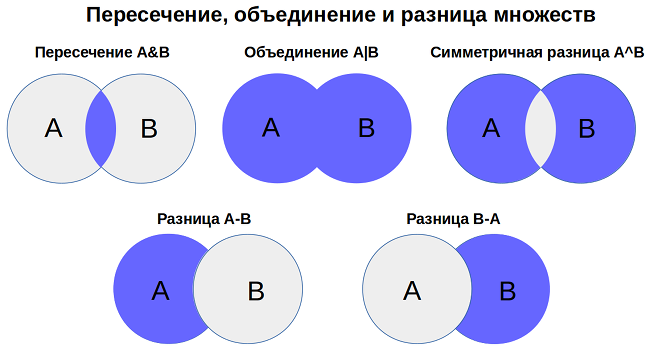

In [29]:
picture('7eefe3.png')

In [30]:
# Зададим исходно два множества (скопировать перед каждым примером ниже)
a = {'a', 'b'}
b = {    'b', 'c'}	# отступ перед b для наглядности

Объединение (union)

In [ ]:
c = a.union(b)     # c = b.union(a) даст такой же результат	
# c = a + b        # Обычное объединение оператором + не работает
		   # TypeError: unsupported operand type(s) for +: 'set' and 'set'
c = a | b          # Альтернативная форма записи объединения
print(c)	   # {'a', 'c', 'b'}

Пересечение (intersection)

In [ ]:
c = a.intersection(b)    # c = b.intersection(a) даст такой же результат
c = a & b                # Альтернативная форма записи пересечения
print(c)                 # {'b'}

Пересечение более 2-х множеств сразу:

In [ ]:
a = {'a', 'b'}
b = {     'b', 'c'}
c = {    'b', 'd'}
d = a.intersection(b, c)	# Первый вариант записи
d = set.intersection(a, b, c)   # Второй вариант записи (более наглядный)
print(d)                        # {'b'}

Разница (difference) — результат зависит от того, какое множество из какого вычитаем

In [ ]:
c = a.difference(b)      # c = a - b другой способ записи дающий тот же результат
print(c)                 # {'a'}
c = b.difference(a)      # c = b - a другой способ записи дающий тот же результат
print(c)                 # {'c'}

Симметричная разница (symmetric_difference) Это своего рода операция противоположная пересечению — выбирает элементы из обеих множеств которые не пересекаются, то есть все кроме совпадающих:

In [ ]:
c = b.symmetric_difference(a)   
# c = a.symmetric_difference(b)       # даст такой же результат
c = b ^ a                             # Альтернативная форма записи симметричной разницы
print(c)        		      # {'a', 'c'}

Для изменения словаря с добавления элементов другого словаря используется метод .update().

Обратите внимание: для совпадающих ключей словаря при этом обновляются значения:

In [ ]:
dict1 = {'a': 1, 'b': 2}
dict2 = {'a': 100, 'c': 3, 'd': 4}
dict1.update(dict2)
print(dict1)        # {'a': 100, 'c': 3, 'b': 2, 'd': 4}

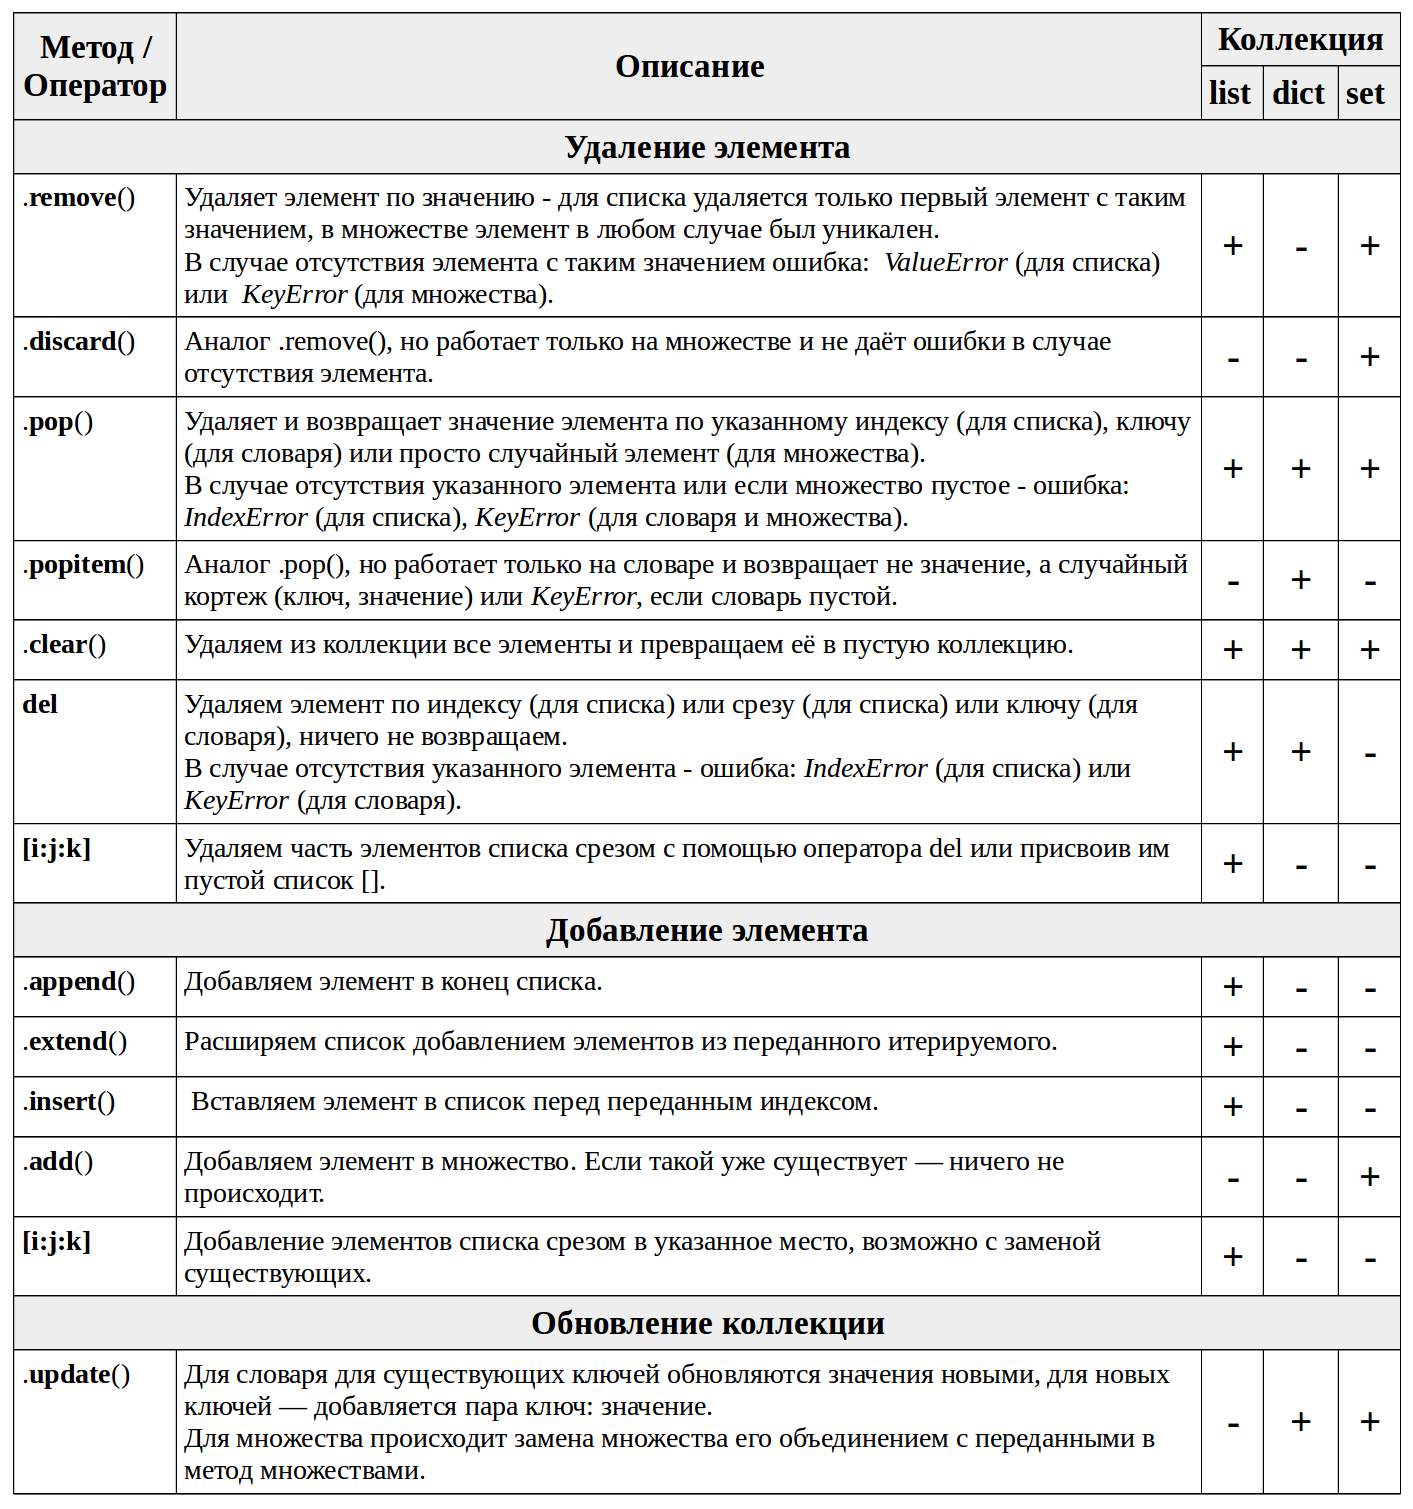

In [34]:
picture('eb583.png')

выражение-генератор (generator expression) — выражение в круглых скобках которое выдает создает на каждой итерации новый элемент по правилам.
генератор коллекции — обобщенное название для генератора списка (list comprehension), генератора словаря (dictionary comprehension) и генератора множества (set comprehension).

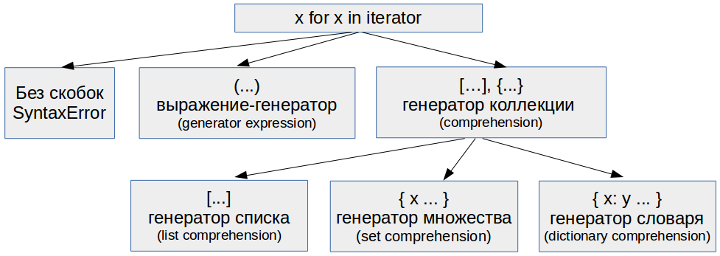

In [35]:
picture('302c5715.png')

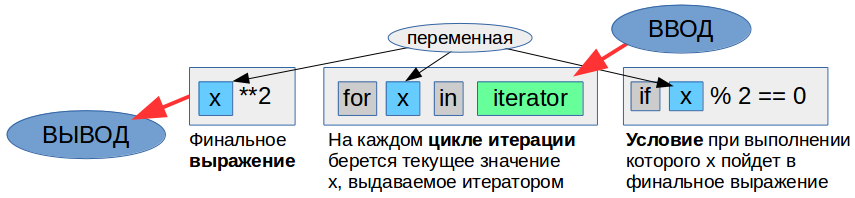

In [36]:
picture('012d078.png')

Ввод — это итератор — это может быть функция-генератор, выражение-генератор, коллекция — любой объект поддерживающий итерацию по нему.
Условие — это фильтр при выполнении которого элемент пойдет в финальное выражение, если элемент ему не удовлетворяет, он будет пропущен.
Финальное выражение — преобразование каждого выбранного элемента перед его выводом или просто вывод без изменений.

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]    # Пусть у нас есть исходный список
list_b = [x for x in list_a]           # Создадим новый список используя генератор списка
print(list_b)                          # [-2, -1, 0, 1, 2, 3, 4, 5]
print(list_a is list_b)                # False - это разные объекты!

Условие проверяется на каждой итерации, и только элементы ему удовлетворяющие идут в обработку в выражении.

In [ ]:
# if x % 2 == 0 - остаток от деления на 2 равен нулю - число четное
list_a = [-2, -1, 0, 1, 2, 3, 4, 5] 
list_b = [x for x in list_a if x % 2 == 0]
print(list_b)   # [-2, 0, 2, 4]

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_b = [x for x in list_a if x % 2 == 0 and x > 0]
# берем те x, которые одновременно четные и больше нуля
print(list_b)   # [2, 4]

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_b = [x**2 for x in list_a]
print(list_b)   # [4, 1, 0, 1, 4, 9, 16, 25]

In [ ]:
list_a = ['a', 'abc', 'abcde']
list_b = [len(x) for x in list_a]
print(list_b)   # [1, 3, 5]

Ветвление выражения

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_b = [x if x < 0 else x**2 for x in list_a]
# Если x-отрицательное - берем x, в остальных случаях - берем квадрат x
print(list_b)   # [-2, -1, 0, 1, 4, 9, 16, 25]

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_b = [x**3 if x < 0 else x**2 for x in list_a if x % 2 == 0]
# вначале фильтр пропускает в выражение только четные значения
# после этого ветвление в выражении для отрицательных возводит в куб, а для остальных в квадрат
print(list_b)   # [-8, 0, 4, 16]

Не забываем, что в Python синтаксис позволяет использовать переносы строк внутри скобок. Используя эту возможность, можно сделать синтаксис генераторов выражений более легким для чтения:

In [ ]:
numbers = range(10)

# Before
squared_evens = [n ** 2 for n in numbers if n % 2 == 0]

# After
squared_evens = [
    n ** 2
    for n in numbers
    if n % 2 == 0
]

 Еще раз обратите внимание на этот момент: если мы создаем большую структуру данных без использования генератора, то она загружается в память целиком, соответственно, это увеличивает расход памяти Вашим приложением, а в крайних случаях памяти может просто не хватить и Ваше приложение «упадет» с MemoryError. В случае использования выражения-генератора, такого не происходит, так как элементы создаются по-одному, в момент обращения.

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_gen = (i for i in list_a)    # выражение-генератор
print(next(my_gen))     # -2 - получаем очередной элемент генератора
print(next(my_gen))     # -1 - получаем очередной элемент генератора

При передаче в функцию дополнительные скобки необязательны

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_sum = sum(i for i in list_a)
# my_sum = sum((i for i in list_a))  # так тоже можно
print(my_sum)   # 12

Нельзя получить длину функцией len()

In [ ]:
my_len = len(i for i in list_a)  # TypeError: object of type 'generator' has no len()

Нельзя распечатать элементы функцией print()

In [ ]:
print(my_gen)   # <generator object <genexpr> at 0x7f162db32af0>

Обратите внимание, что после прохождения по выражению-генератору оно остается пустым!

In [38]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_gen = (i for i in list_a)
print(sum(my_gen))  # 12
print(sum(my_gen))  # 0

12
0


Выражение-генератор может быть бесконечным

In [ ]:
import itertools
inf_gen = (x for x in itertools.count())  # бесконечный генератор от 0 to бесконечности!

К выражению-генератору не применимы срезы!

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_gen = (i for i in list_a)
my_gen_sliced = my_gen[1:3]
# TypeError: 'generator' object is not subscriptable

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_gen = (i for i in list_a)   # выражение-генератор
my_list = list(my_gen) 
print(my_list)          # [-2, -1, 0, 1, 2, 3, 4, 5]

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_list = list(i for i in list_a)
print(my_list)          # [-2, -1, 0, 1, 2, 3, 4, 5]

In [ ]:
# кортеж
my_tuple = tuple(i for i in list_a)
print(my_tuple)         # (-2, -1, 0, 1, 2, 3, 4, 5)

# множество
my_set = set(i for i in list_a)
print(my_set)           # {0, 1, 2, 3, 4, 5, -1, -2}

# неизменное множество
my_frozenset = frozenset(i for i in list_a)
print(my_frozenset)     # frozenset({0, 1, 2, 3, 4, 5, -1, -2})

Генератор списка (list comprehension)

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_list = [i for i in list_a]
print(my_list)          # [-2, -1, 0, 1, 2, 3, 4, 5]

Не пишите круглые скобки в квадратных!

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_list = [(i for i in list_a)]
print(my_list)          # [<generator object <genexpr> at 0x7fb81103bf68>]

Генератор множества (set comprehension)

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
my_set= {i for i in list_a}
print(my_set)       # {0, 1, 2, 3, 4, 5, -1, -2} - порядок случаен

Генератор словаря (dictionary comprehension)
переворачивание словаря

In [ ]:
dict_abc = {'a': 1, 'b': 2, 'c': 3, 'd': 3}
dict_123 = {v: k for k, v in dict_abc.items()}
print(dict_123)  # {1: 'a', 2: 'b', 3: 'd'}
                 # Обратите внимание, мы потеряли "с"! Так как значения были одинаковы, 
                 # то когда они стали ключами, только последнее значение сохранилось.

Словарь из списка:

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
dict_a = {x: x**2 for x in list_a}
print(dict_a)   # {0: 0, 1: 1, 2: 4, 3: 9, 4: 16, -2: 4, -1: 1, 5: 25}

Важно! Такой синтаксис создания словаря работает только в фигурных скобках, выражение-генератор так создать нельзя, для этого используется немного другой синтаксис

In [ ]:
# dict_gen = (x: x**2 for x in list_a)      # SyntaxError: invalid syntax
dict_gen = ((x, x ** 2) for x in list_a)    # Корректный вариант генератора-выражения для словаря
# dict_a = dict(x: x**2 for x in list_a)    # SyntaxError: invalid syntax
dict_a = dict((x, x ** 2) for x in list_a)  # Корректный вариант синтаксиса

Для создания строки вместо синтаксиса выражений-генераторов используется метод строки .join(), которому в качестве аргументов можно передать выражение генератор.
Обратите внимание: элементы коллекции для объединения в строку должны быть строками!

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
# используем генератор прямо в .join() одновременно приводя элементы к строковому типу
my_str = ''.join(str(x) for x in list_a)
print(my_str)  # -2-1012345

Иногда в условиях задачи в условии-фильтре нужна не проверка значения текущего элемента, а проверка на определенную периодичность, то есть, например, нужно брать каждый третий элемент.

Для подобных задач можно использовать функцию enumerate(), задающую счетчик при обходе итератора в цикле:

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_d = [(i, x) for i, x in enumerate(list_a)]
print(list_d)   # [(0, -2), (1, -1), (2, 0), (3, 1), (4, 2), (5, 3), (6, 4), (7, 5)]

Теперь попробуем решить реальную задачу — выберем в генераторе списка каждый третий элемент из исходного списка:

In [ ]:
list_a = [-2, -1, 0, 1, 2, 3, 4, 5]
list_e = [x for i, x in enumerate(list_a, 1) if i % 3 == 0]
print(list_e)   # [0, 3]

Возможны два варианта вызова функции enumerate():
enumerate(iterator) без второго параметра считает с 0.
enumerate(iterator, start) — начинает считать с значения start. Удобно, например, если нам надо считать с 1, а не 0.

enumerate() возвращает кортеж из порядкового номера и значения текущего элемента итератора. Кортеж в выражении-генераторе результате можно получить двумя способами:
(i, j) for i, j in enumerate(iterator) — скобки в первой паре нужны!
pair for pair in enumerate(mylist) — мы работаем сразу с парой

Индексы считаются для всех обработанных элементов, без учета прошли они в дальнейшем условие или нет!

In [ ]:
first_ten_even = [(i, x) for i, x in enumerate(range(10)) if x % 2 == 0]
print(first_ten_even)   # [(0, 0), (2, 2), (4, 4), (6, 6), (8, 8)]

Функция enumerate() не обращается к каким-то внутренним атрибутам коллекции, а просто реализует счетчик обработанных элементов, поэтому ничего не мешает ее использовать для неупорядоченных коллекций не имеющих индексации.

Иногда бывает задача из очень большой коллекции или даже бесконечного генератора получить выборку первых нескольких элементов, удовлетворяющих условию.

Если мы используем обычное генераторное выражение с условием ограничением по enumerate() индексу или срез полученной результирующей коллекции, то нам в любом случае придется пройти всю огромную коллекцию и потратить на это уйму компьютерных ресурсов.

Выходом может быть использование функции islice() из пакета itertools.

In [ ]:
import itertools
first_ten = (itertools.islice((x for x in range(1000000000) if x % 2 == 0), 10))
print(list(first_ten))  # [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Для сомневающихся: проверяем время выполнения

In [57]:
import time
import itertools

# На генераторе с малым количеством элементов
start_time = time.time()
first_ten = (itertools.islice((x for x in range(100) if x % 2 == 0), 10))
print(list(first_ten))  # [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
elapsed_time = time.time() - start_time
print(elapsed_time)  # 3.409385681152344e-05

# На генераторе с огромным количеством элементов
start_time = time.time()
first_ten = (itertools.islice((x for x in range(100000000) if x % 2 == 0), 10))
print(list(first_ten))  # [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
elapsed_time = time.time() - start_time
print(elapsed_time)  # 1.1205673217773438e-05

# То есть максимальное количество элементов в генераторе range() мы увеличили на 6 порядков, 
# а время исполнения осталось того же порядка

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
0.0010006427764892578
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
0.0


При работае с вложенными циклами внутри генератора выражений порядок следования инструкций for in будет такой же (слева-направо), как и в аналогичном решении без генератора, только на циклах (сверху-вниз)! Тоже справедливо и при более глубоких уровнях вложенности.

Общий синтаксис: [expression for x in iter1 for y in iter2]

In [ ]:
rows = 1, 2, 3
cols = 'a', 'b'
my_dict = {(col, row): 0 for row in rows for col in cols}
print(my_dict)  # {('a', 1): 0, ('b', 2): 0, ('b', 3): 0, ('b', 1): 0, ('a', 3): 0, ('a', 2): 0}

Тоже можно сделать и с дополнительными условиями-фильтрами в каждом цикле:

In [ ]:
rows = 1, 2, 3, -4, -5
cols = 'a', 'b', 'abc'
# Для наглядности разнесем на несколько строк
my_dict = {
    (col, row): 0  # каждый элемент состоит из ключа-кортежа и нулевого знаечния
    for row in rows if row > 0   # Только положительные значения
    for col in cols if len(col) == 1  # Только односимвольные
    }
print(my_dict)  # {('a', 1): 0, ('b', 2): 0, ('b', 3): 0, ('b', 1): 0, ('a', 3): 0, ('a', 2): 0}

Эта же задача решенная с помощью цикла

In [ ]:
rows = 1, 2, 3, -4, -5
cols = 'a', 'b', 'abc'
my_dict = {}
for row in rows:
    if row > 0:
        for col in cols:
            if len(col) == 1:
                my_dict[col, row] = 0
print(my_dict)  # {('a', 1): 0, ('b', 2): 0, ('b', 3): 0, ('b', 1): 0, ('a', 3): 0, ('a', 2): 0}

Вложенные циклы for где внутренний цикл идет по результату внешнего цикла

Общий синтаксис: [expression for x in iterator for y in x].

Стандартный подход, когда нам надо обходить двумерную структуру данных, превращая ее в «плоскую» одномерную. В данном случае, мы во внешнем цикле проходим по строкам, а во внутреннем по элементам каждой строки нашей двумерной структуры.

In [58]:
matrix = [[0, 1, 2, 3],
          [10, 11, 12, 13],
          [20, 21, 22, 23]]

# Решение с помощью генератора списка:
flattened = [n for row in matrix for n in row]
print(flattened)    # [0, 1, 2, 3, 10, 11, 12, 13, 20, 21, 22, 23]

[0, 1, 2, 3, 10, 11, 12, 13, 20, 21, 22, 23]


Таже задача, решенная с помощью вложенных циклов

In [59]:
flattened = []
for row in matrix:
    for n in row:
        flattened.append(n)
print(flattened)

[0, 1, 2, 3, 10, 11, 12, 13, 20, 21, 22, 23]


Изящные решения из комментариев

In [ ]:
import itertools
flattened = list(itertools.chain.from_iterable(matrix))
# Данный подход намного быстрее генератора списков 
# и рекомендован к использованию для подобных задач.

flattened = sum(a, [])
# sum(a, []) имеет квадратическую сложность(O(n^2)) 
# и потому совсем не рекомендуется к использованию для таких целей

Вложенными могут быть не только циклы for внутри выражения-генератора, но и сами генераторы.
Такой подход применяется когда нам надо строить двумерную структуру.

Важно!: В отличии от примеров выше с вложенными циклами, для вложенных генераторов, вначале обрабатывается внешний генератор, потом внутренний, то есть порядок идет справа-налево.

 Вложенный генератор внутри генератора — двумерная из двух одномерных

Общий синтаксис: [[expression for y in iter2] for x in iter1]

Применение: генерируем двумерную структуру, используя данные из двух одномерных итераторов.

In [ ]:
w, h = 5, 3  # зададим ширину и высотку матрицы
matrix = [[0 for x in range(w)] for y in range(h)]
print(matrix)   # [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

Создание этой же матрицы двумя вложенными циклами - обратите внимание на порядок вложения

In [ ]:
matrix = []
for y in range(h):
    new_row = []
    for x in range(w):
        new_row.append(0)
    matrix.append(new_row)
print(matrix)   # [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]

Вложенный генератор внутри генератора — двумерная из двумерной

Общий синтаксис: [[expression for y in x] for x in iterator]
Применение: Обходим двумерную структуру данных, сохраняя результат в другую двумерную структуру.

In [ ]:
matrix = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]

squared = [[cell**2 for cell in row] for row in matrix]
print(squared)    # [[1, 4, 9, 16], [25, 36, 49, 64], [81, 100, 121, 144]]

Эта же операция в виде вложенных циклов

In [ ]:
squared = []
for row in matrix:
    new_row = []
    for cell in row:
        new_row.append(cell**2)
    squared.append(new_row)
print(squared)    # [[1, 4, 9, 16], [25, 36, 49, 64], [81, 100, 121, 144]]

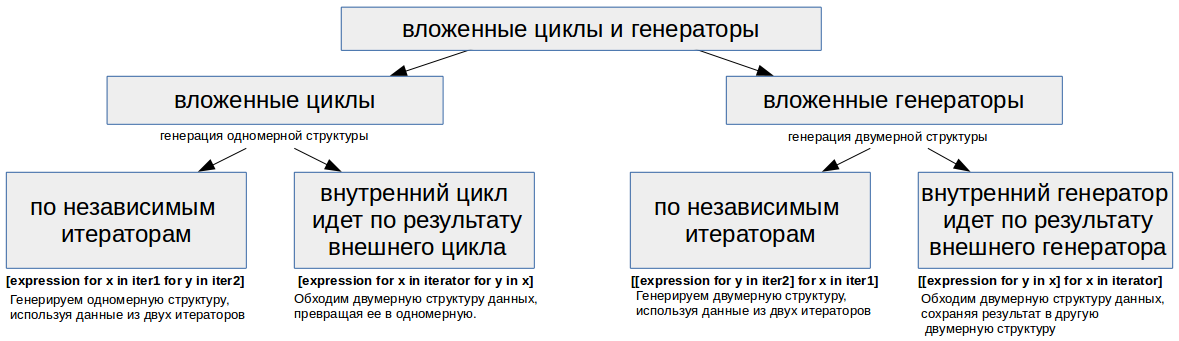

In [60]:
picture('f0387f.png')

Генератор итерирующийся по генератору

Так как любой генератор может использоваться как итератор в цикле for, это так же можно использовать и для создания генератора по генератору.
При этом синтаксически это может записываться в два выражения или объединяться во вложенный генератор.

In [ ]:
list_a = [x for x in range(-2, 4)]    # Так сделано для дальнейшего примера синтаксиса, 
                                      # конечно в подобной задаче досточно только range(-2, 4)
list_b = [x**2 for x in list_a]

Тоже самое можно записать и в одно выражение, подставив вместо list_a его генератор списка:

In [ ]:
list_c = [x**2 for x in [x for x in range(-2, 4)]]
print(list_c)  # [4, 1, 0, 1, 4, 9]

Преимущество от комбинирования генераторов на примере сложной функции f(x) = u(v(x))

In [62]:
list_c = [t + t ** 2  for t in (x ** 3 + x ** 4 for x in range(-2, 4))]
print(list_c)

[72, 0, 0, 6, 600, 11772]


В Python 3 range() возвращает генератор, который при каждом к нему обращении выдает очередной элемент.

В Python 2 были 2 функции:

range(...) которая аналогична выражению list(range(...)) в Python 3 — то есть она выдавала не итератор, а сразу готовый список. То есть все проблемы возможной нехватки памяти, описанные в разделе 4 актуальны, и использовать ее в Python 2 надо очень аккуратно!
xrange(...) — которая работала аналогично range(...) в Python 3 и из 3 версии была исключена.

Последовательный проход по нескольким спискам

In [63]:
import itertools
l1 = [1,2,3]
l2 = [10,20,30]
result = [l*2 for l in itertools.chain(l1, l2)]
print(result)   # [2, 4, 6, 20, 40, 60]

[2, 4, 6, 20, 40, 60]


Транспозиция матрицы
(Преобразование матрицы, когда строки меняются местами со столбцами).

In [64]:
matrix = [[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12]]

transposed = [[row[i] for row in matrix] for i in range(len(matrix[0]))]
print(transposed)  # [[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]

[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]


Эта же транспозиция матрицы в виде цикла

In [ ]:
transposed = []
for i in range(len(matrix[0])):
    new_row = []
    for row in matrix:
        new_row.append(row[i])
    transposed.append(new_row)
print(transposed)  # [[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]

In [65]:
transposed = list(map(list, zip(*matrix)))
print(transposed)  # [[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]

[[1, 5, 9], [2, 6, 10], [3, 7, 11], [4, 8, 12]]


Задача выбора только рабочих дней

In [66]:
# Формируем список дней от 1 до 31 с которым будем работать
days = [d for d in range(1, 32)]

# Делим список дней на недели
weeks = [days[i:i+7] for i in range(0, len(days), 7)]
print(weeks)   # [[1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14], [15, 16, 17, 18, 19, 20, 21], [22, 23, 24, 25, 26, 27, 28], [29, 30, 31]]

# Выбираем в каждой неделе только первые 5 рабочих дней, отбрасывая остальные
work_weeks = [week[0:5] for week in weeks]
print(work_weeks)   # [[1, 2, 3, 4, 5], [8, 9, 10, 11, 12], [15, 16, 17, 18, 19], [22, 23, 24, 25, 26], [29, 30, 31]]

# Если нужно одним списком дней - можно объединить
wdays = [item for sublist in work_weeks for item in sublist]
print(wdays)   # [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31]

[[1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14], [15, 16, 17, 18, 19, 20, 21], [22, 23, 24, 25, 26, 27, 28], [29, 30, 31]]
[[1, 2, 3, 4, 5], [8, 9, 10, 11, 12], [15, 16, 17, 18, 19], [22, 23, 24, 25, 26], [29, 30, 31]]
[1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31]


Можно убрать выходные еще более изящно, используя только индексы

In [ ]:
# Формируем список дней от 1 до 31 с которым будем работать
days = [d for d in range(1, 32)]

wdays6 = [wd for (i, wd) in enumerate(days, 1) if i % 7 != 0]  # Удаляем каждый 7-й день
# Удаляем каждый 6 день в оставшихся после первого удаления:
wdays5 = [wd for (i, wd) in enumerate(wdays6, 1) if i % 6 != 0]

print(wdays5)
# [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 29, 30, 31]

# Обратите внимание, что просто объединить два условия в одном if не получится,
# как минимум потому, что 12-й день делится на 6, но не выпадает на последний 2 дня недели!

# Шикарное короткое решение:
days = [d + 1 for d in range(31) if d % 7 < 5]

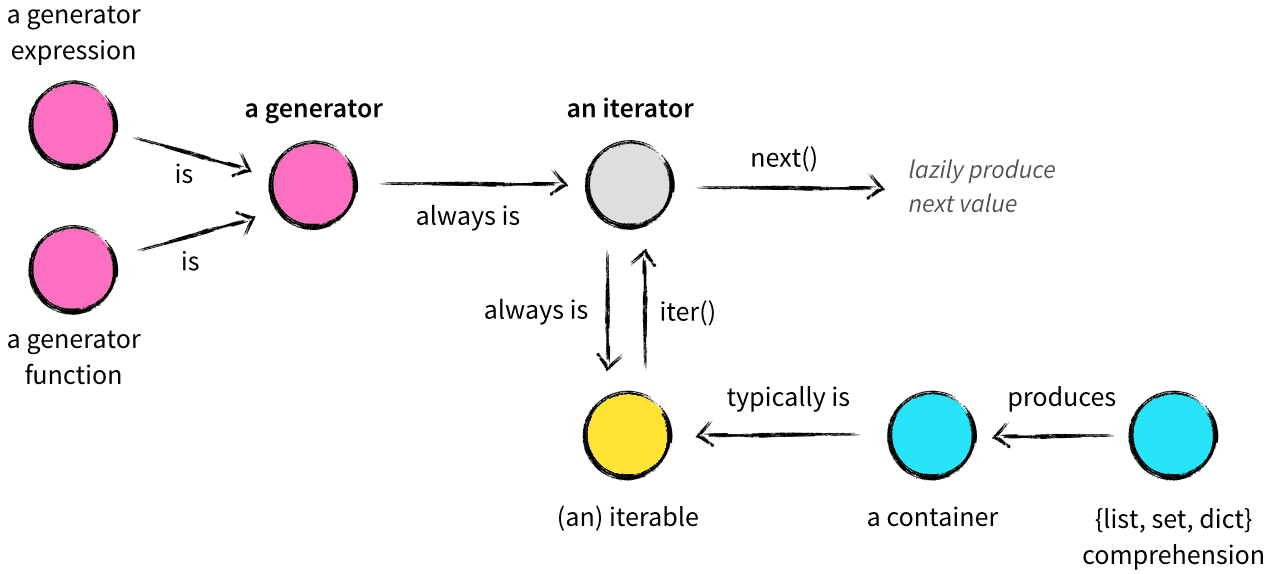

In [67]:
picture('1addf3.png')

Существуюет расширение Python — PythonQL, позволяющее работать с базами данных в стиле генераторов коллекций.

Если у Вас есть сложности с пониманием логики работы с генераторными выражениями, посмотрите интересную англоязычную статью, где проводятся аналогии между генераторными выражениями и работой с SQL и таблицами Excel.
http://blog.lerner.co.il/want-to-understand-pythons-comprehensions-think-like-an-accountant/

In [ ]:
squared_evens = [n ** 2             # SELECT
                for n in numbers    # FROM
                if n % 2 == 0]      # WHERE